In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Expresso_Churn_Prediction/Train.csv")
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Expresso_Churn_Prediction/Test.csv")
sample_sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Expresso_Churn_Prediction/SampleSubmission.csv")
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 2200

In [3]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [4]:
test.head()


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [5]:
sample_sub.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


**Data** **Cleaning**

1.   Handling Missing Values
2.   Handling duplicates
3.   Check data types
4.   Understanding the dataset







In [6]:
train.shape, test.shape , sample_sub.shape

((2154048, 19), (380127, 18), (380127, 2))

In [7]:
train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [9]:
train.isnull().sum()

,0
user_id,0
REGION,849299
TENURE,0
MONTANT,756739
FREQUENCE_RECH,756739
REVENUE,726048
ARPU_SEGMENT,726048
FREQUENCE,726048
DATA_VOLUME,1060433
ON_NET,786675


In [10]:
train.duplicated().sum(),test.duplicated().sum()

(np.int64(0), np.int64(0))

In [11]:

test.isnull().sum()

,0
user_id,0
REGION,149728
TENURE,0
MONTANT,133055
FREQUENCE_RECH,133055
REVENUE,127373
ARPU_SEGMENT,127373
FREQUENCE,127373
DATA_VOLUME,187040
ON_NET,138514


In [12]:

train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [13]:

train.describe(include='O').T

,count,unique,top,freq
user_id,2154048,2154048,ffff54079880e00af686f7d6403dd506c9560430,1
REGION,1304749,14,DAKAR,513271
TENURE,2154048,8,K > 24 month,2043201
MRG,2154048,1,NO,2154048
TOP_PACK,1251454,140,All-net 500F=2000F;5d,317802


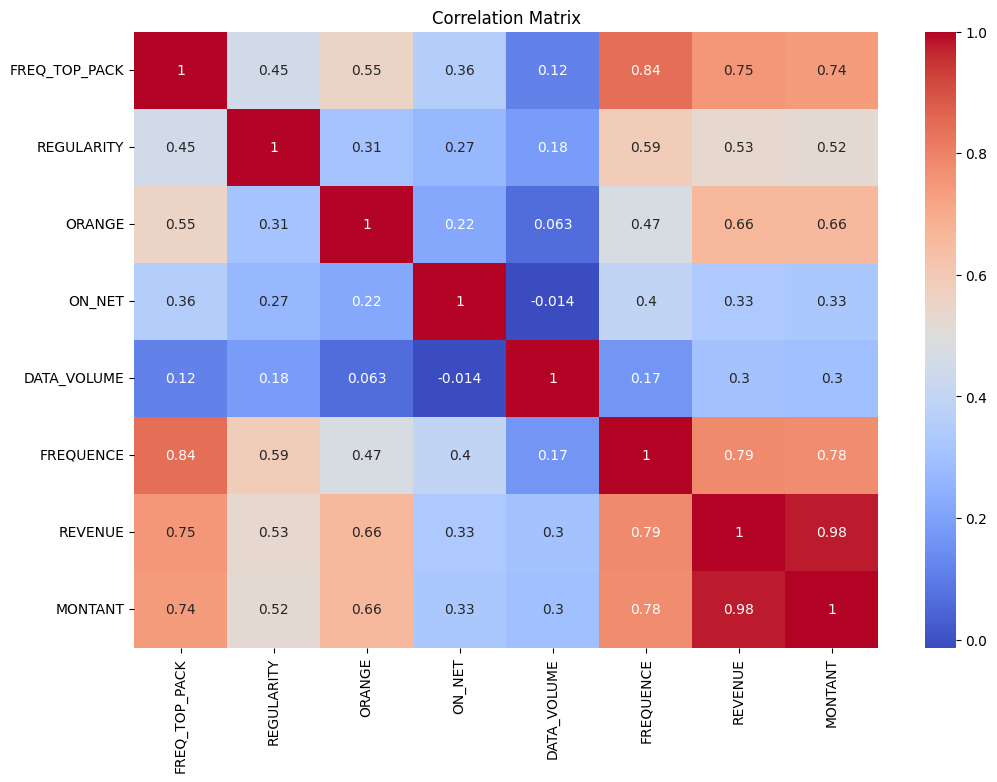

In [14]:
numerical_features = ["FREQ_TOP_PACK", "REGULARITY", "ORANGE", "ON_NET", "DATA_VOLUME", "FREQUENCE", "REVENUE", "MONTANT"]
correlation =train[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

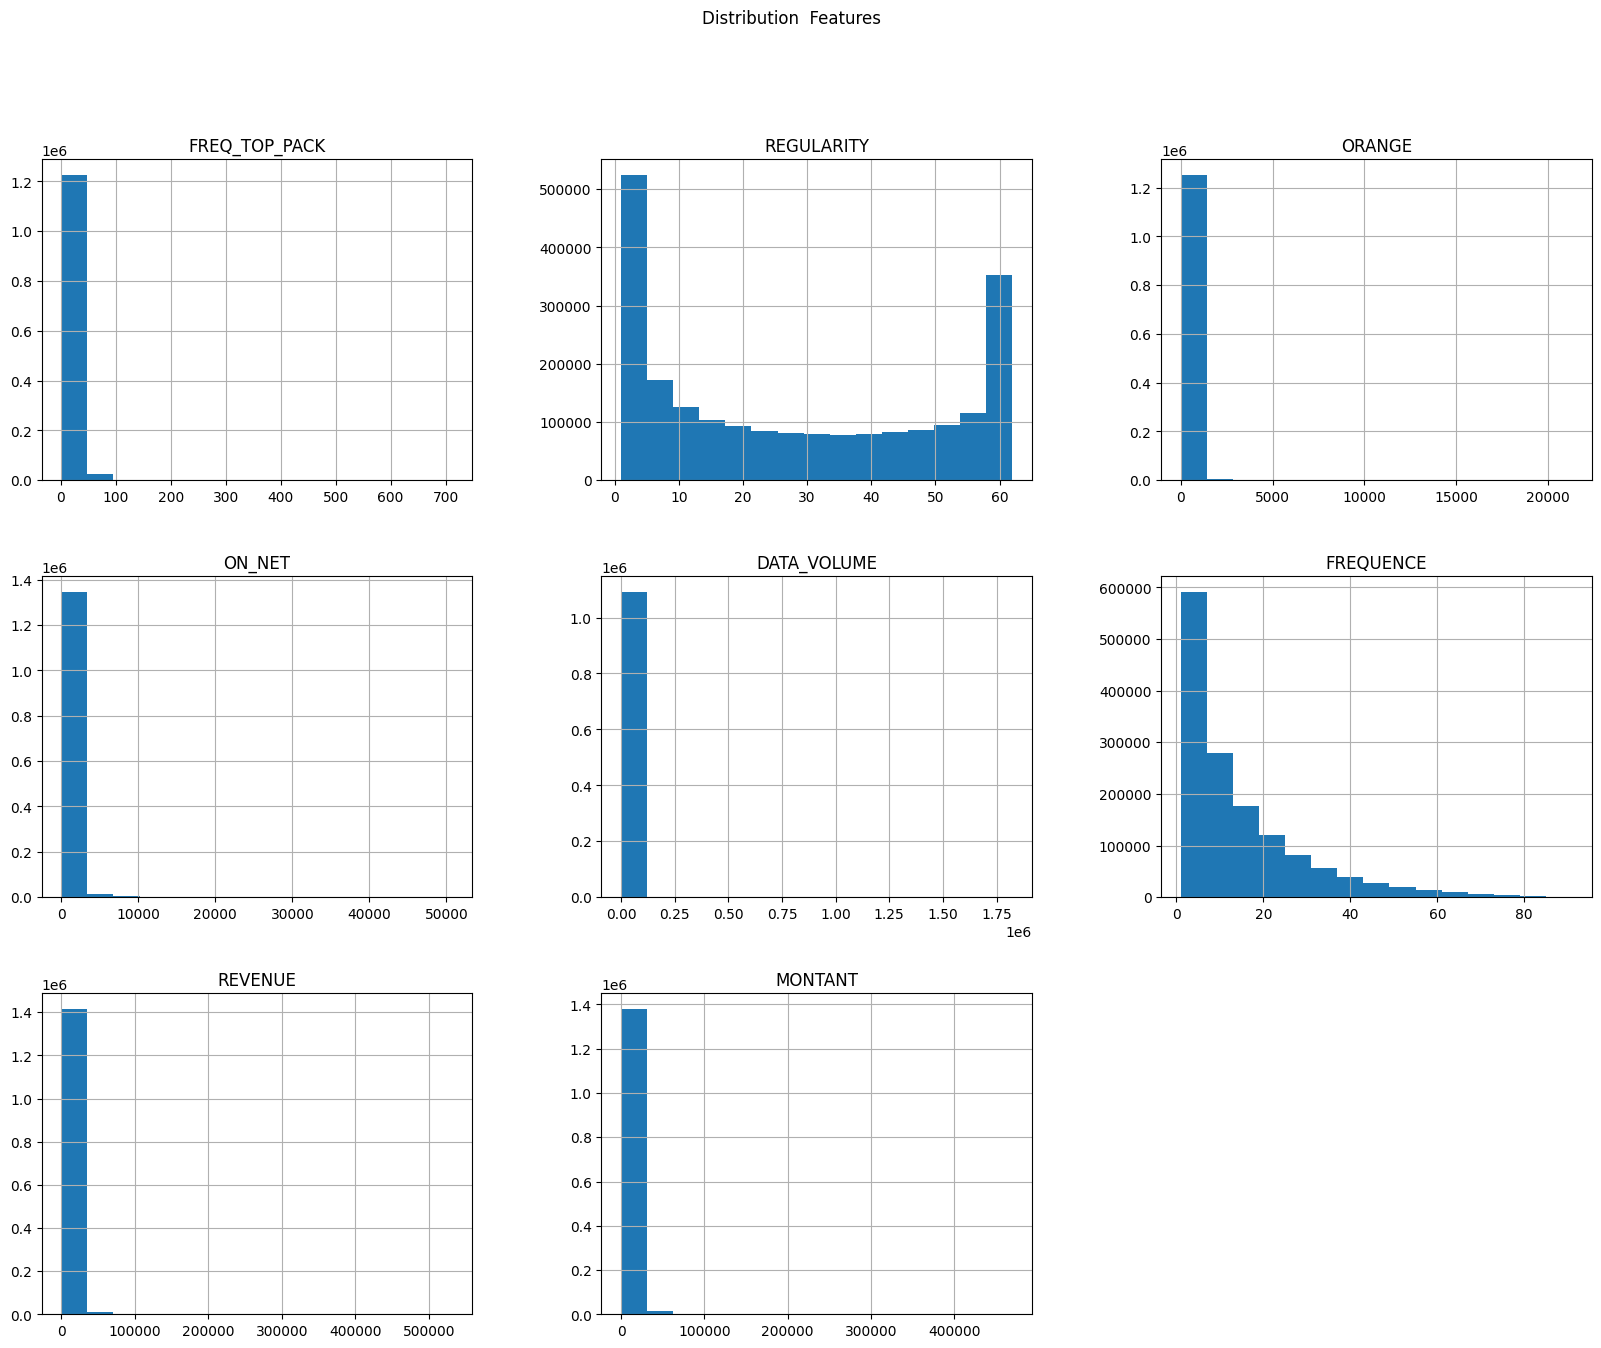

In [15]:
# Plot histograms for numerical features
numerical_features = ["FREQ_TOP_PACK", "REGULARITY", "ORANGE", "ON_NET", "DATA_VOLUME", "FREQUENCE", "REVENUE", "MONTANT"]
train[numerical_features].hist(figsize=(20, 15), bins=15)
plt.suptitle('Distribution  Features')
plt.show()

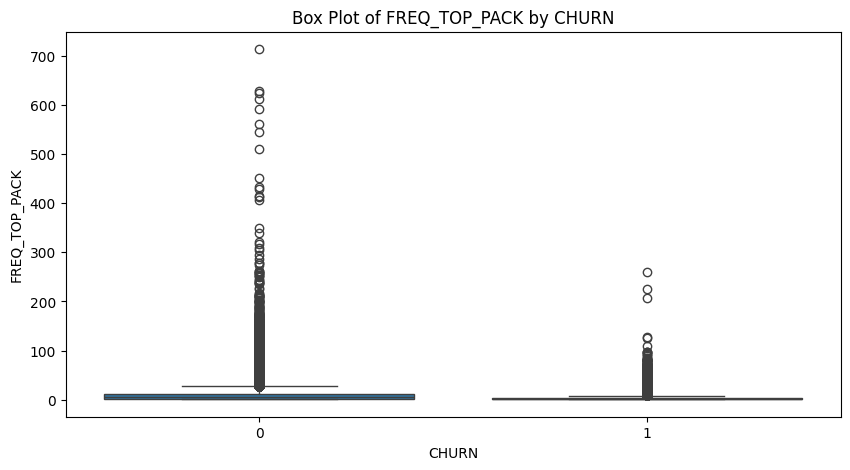

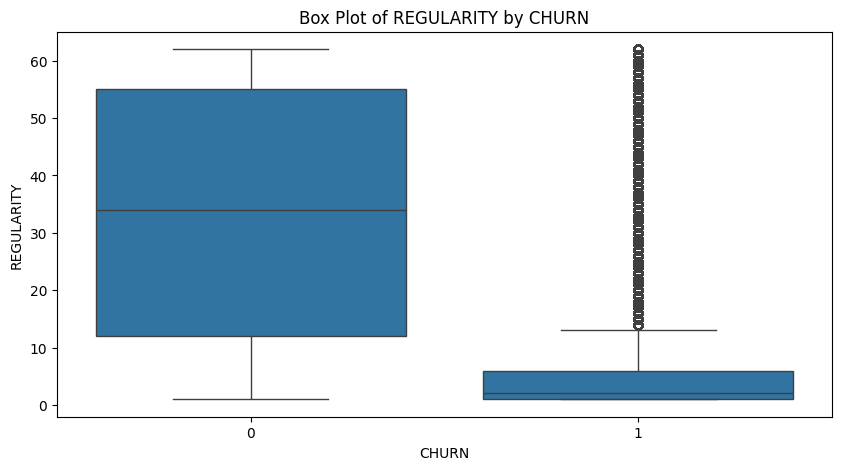

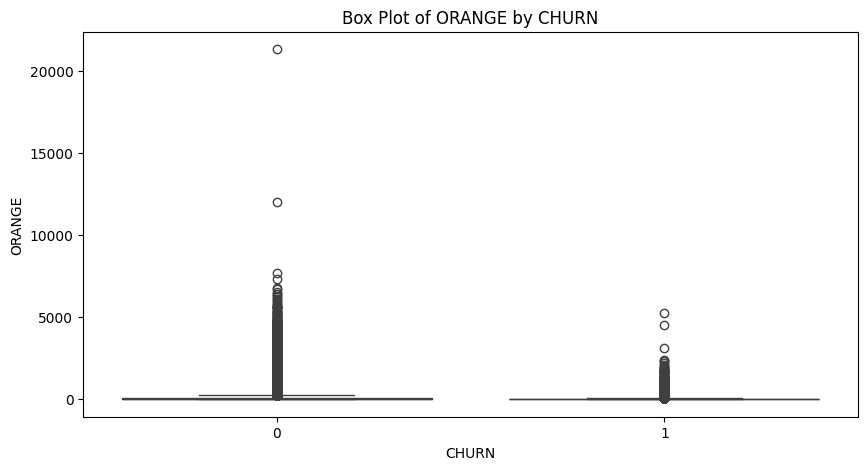

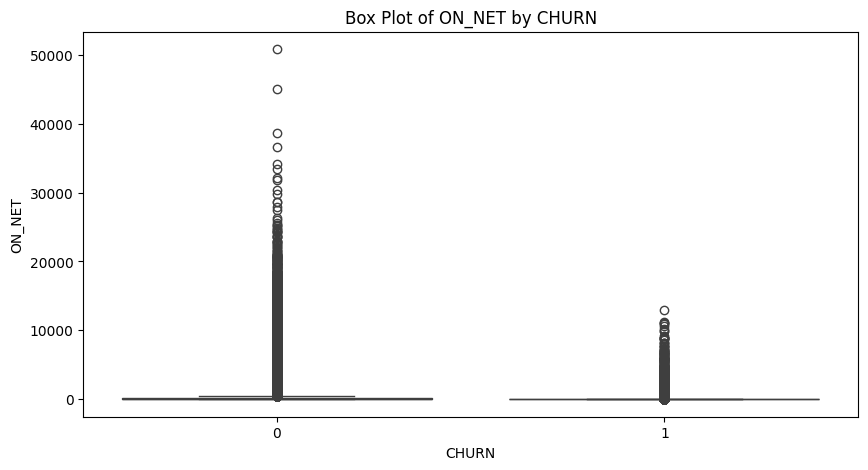

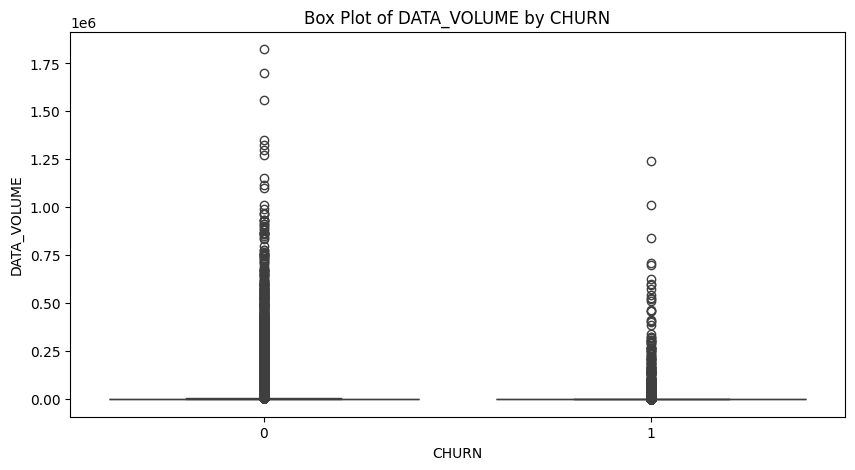

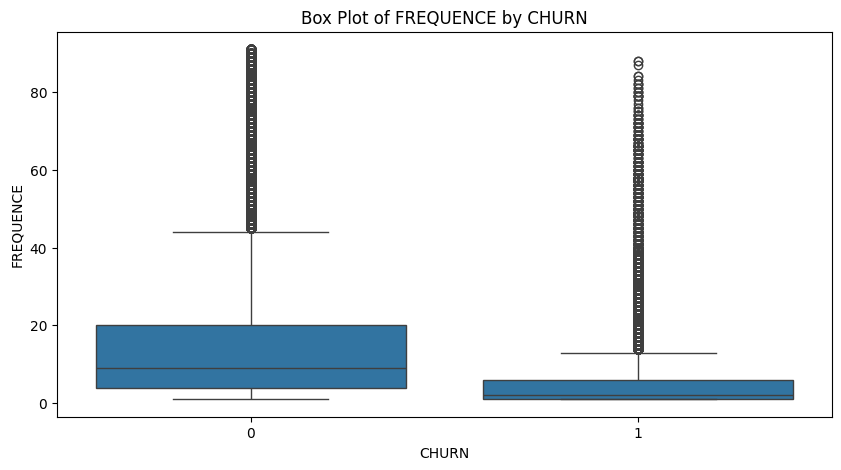

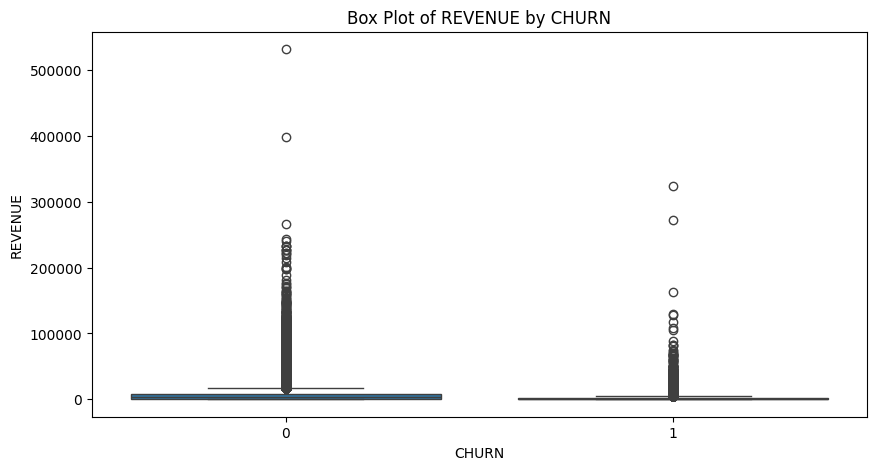

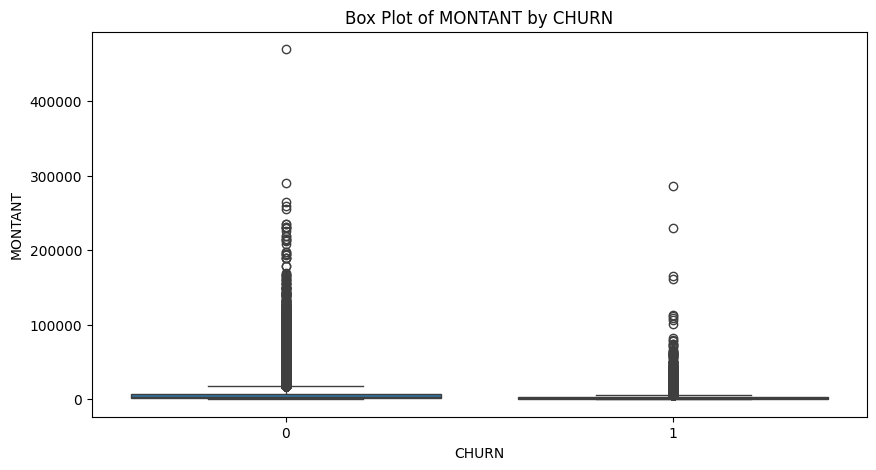

In [16]:
# Plot box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='CHURN', y=col, data=train)
    plt.title(f'Box Plot of {col} by CHURN')
    plt.show()
    print("\n")

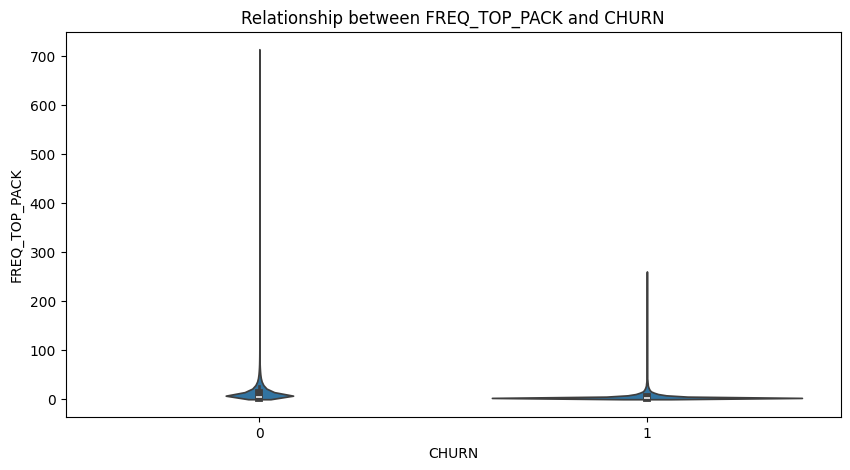

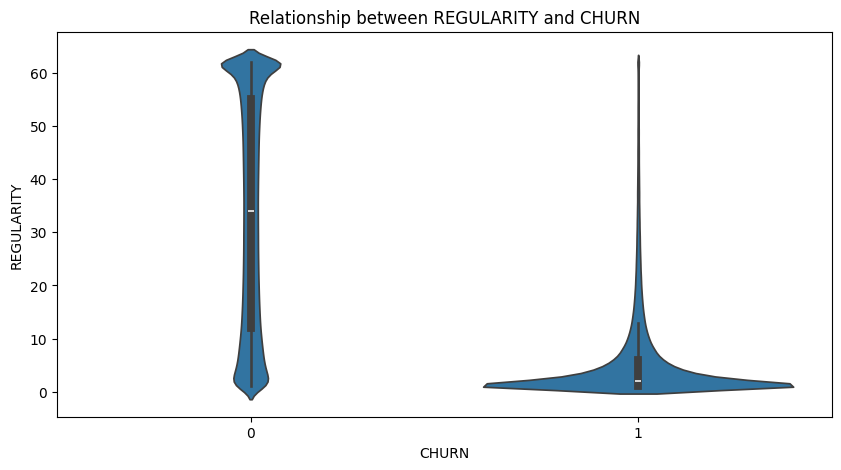

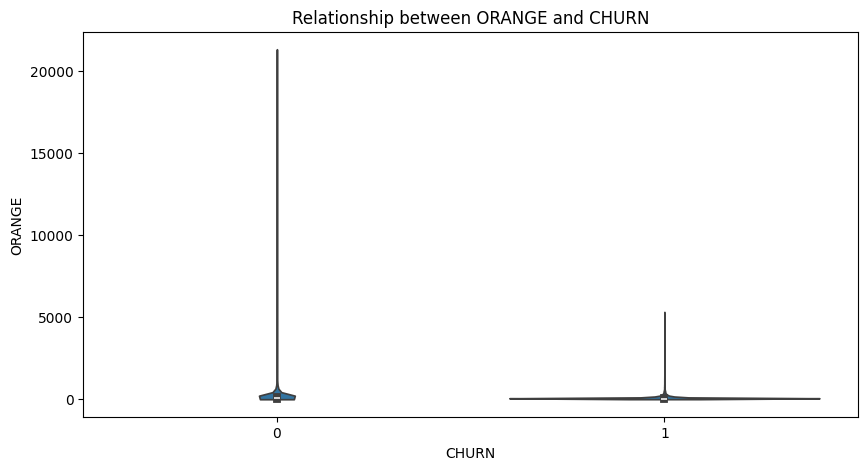

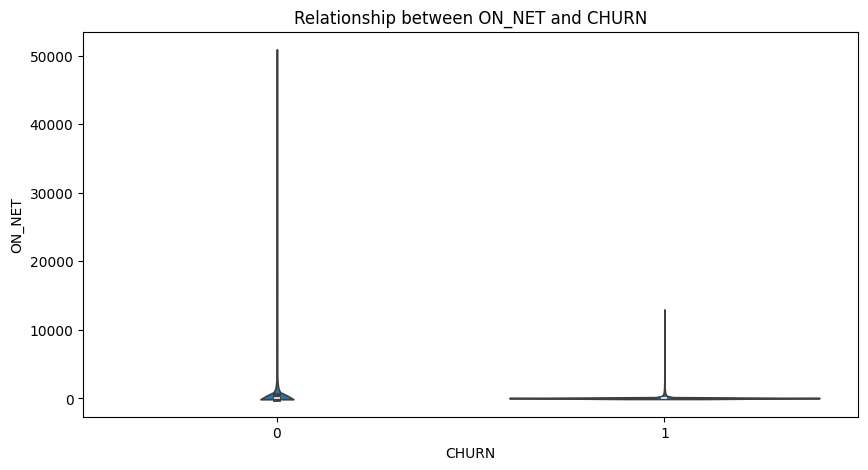

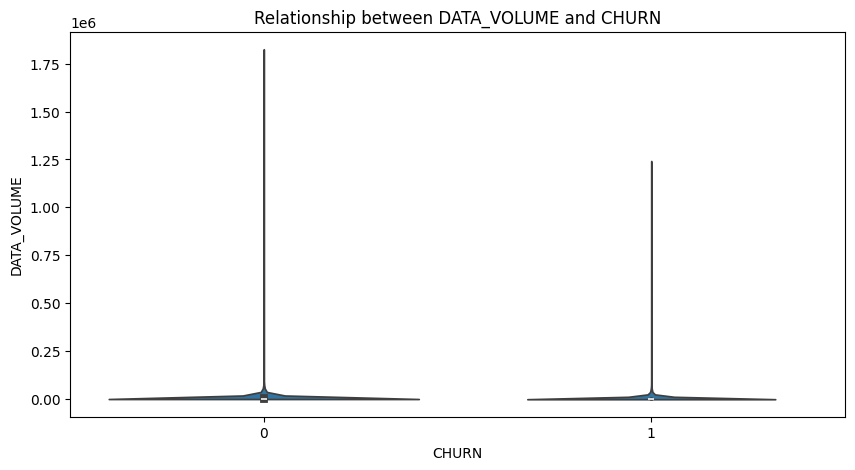

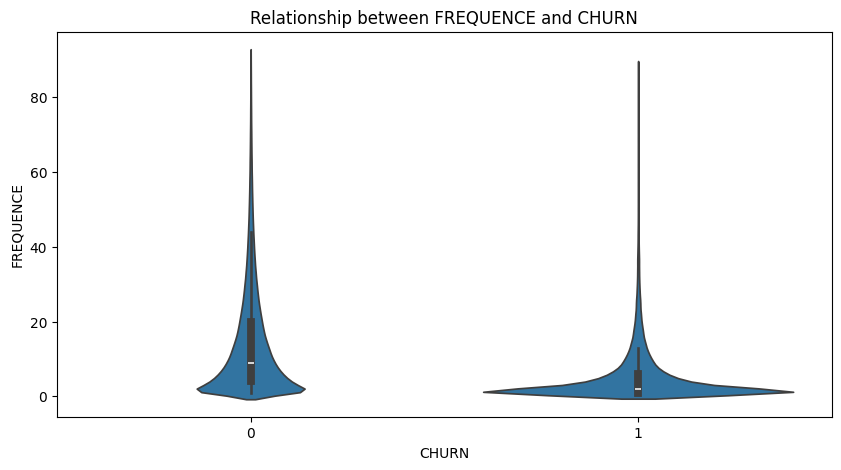

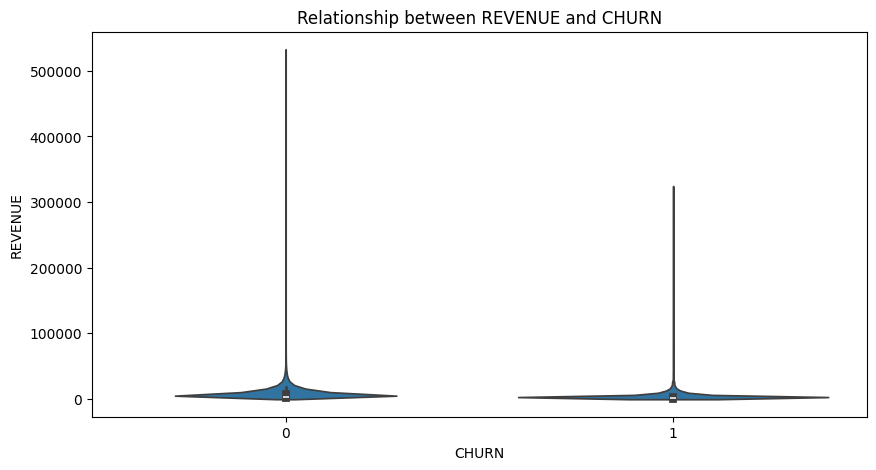

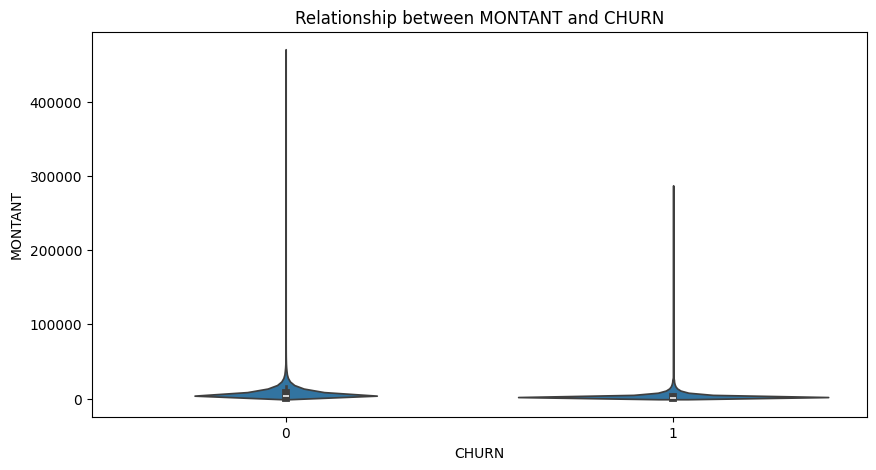

In [17]:
# Plot the relationship between numerical features and the target variable
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='CHURN', y=col, data=train)
    plt.title(f'Relationship between {col} and CHURN')
    plt.show()
    print("\n")

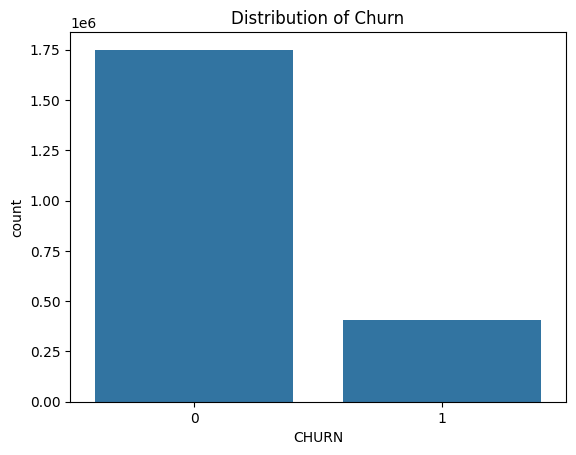

In [18]:
# Visualizing the target variable 'CHURN'
sns.countplot(x='CHURN', data=train)
plt.title('Distribution of Churn')
plt.show()

In [19]:
# Descriptive statistics of the training data
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [20]:
# Dropping target variable from training data
churn = train['CHURN']
train = train.drop('CHURN', axis=1)
train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0


In [21]:
# Combine train and test data for similar preprocessing
data = pd.concat([train, test], sort=False)
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0


In [22]:
# Check for missing values
data.isnull().sum()


,0
user_id,0
REGION,999027
TENURE,0
MONTANT,889794
FREQUENCE_RECH,889794
REVENUE,853421
ARPU_SEGMENT,853421
FREQUENCE,853421
DATA_VOLUME,1247473
ON_NET,925189


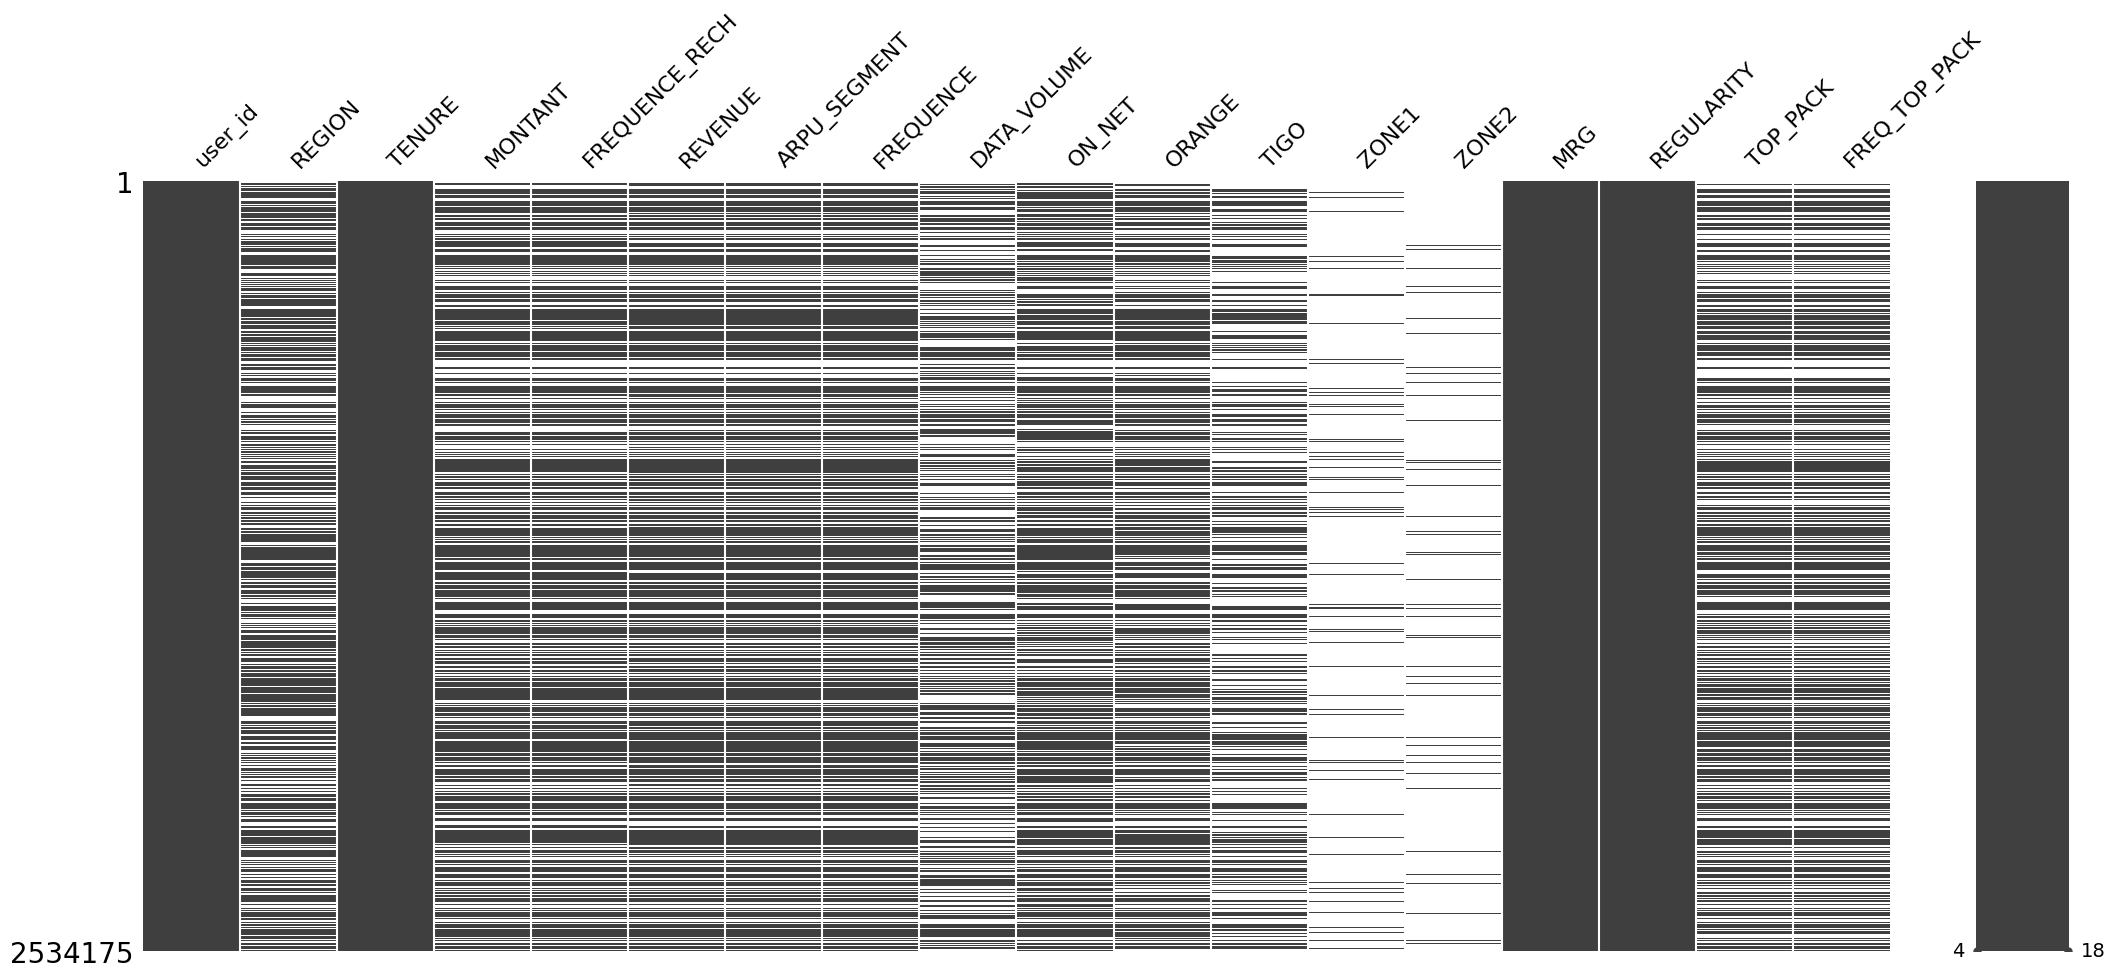

In [23]:
msno.matrix(data);

In [24]:
# Drop columns with too many missing values or not useful for the model
data = data.drop(['ZONE1', 'ZONE2'], axis=1)
data


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,NO,54,On net 200F=Unlimited _call24H,8.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NO,17,On-net 1000F=10MilF;10d,1.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NO,62,"Data:1000F=5GB,7d",11.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NO,29,"Data: 100 F=40MB,24H",11.0


In [25]:
# Fill missing values in categorical columns with "Missing_{column_name}"
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(f'Missing_{col}', inplace=True)

# Fill missing values in numerical columns with the median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify that there are no missing values left
data.isnull().sum()

,0
user_id,0
REGION,0
TENURE,0
MONTANT,0
FREQUENCE_RECH,0
REVENUE,0
ARPU_SEGMENT,0
FREQUENCE,0
DATA_VOLUME,0
ON_NET,0


In [26]:
data

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,NO,54,On net 200F=Unlimited _call24H,8.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,Missing_REGION,I 18-21 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,NO,4,Missing_TOP_PACK,5.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,Missing_REGION,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,258.0,90.0,46.0,7.0,NO,17,On-net 1000F=10MilF;10d,1.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NO,62,"Data:1000F=5GB,7d",11.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,258.0,39.0,24.0,6.0,NO,11,Mixt 250F=Unlimited_call24H,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,Missing_REGION,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,NO,1,Missing_TOP_PACK,5.0
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,Missing_REGION,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,6.0,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,Missing_REGION,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,6.0,NO,29,"Data: 100 F=40MB,24H",11.0


In [27]:
# View Overcorrelated columns
data[['REVENUE','ARPU_SEGMENT']]


,REVENUE,ARPU_SEGMENT
0,4251.0,1417.0
1,3000.0,1000.0
2,1020.0,340.0
3,13502.0,4501.0
4,985.0,328.0
...,...,...
380122,3999.0,1333.0
380123,3000.0,1000.0
380124,3949.0,1316.0
380125,3955.0,1318.0


In [28]:
# Drop Overcorrelated columns
data = data.drop(['REVENUE'], axis=1)

In [29]:
# Display the number of unique categories in all object columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create a DataFrame to display the results
unique_categories = pd.DataFrame({
    'Column': categorical_columns,
    'Unique Categories': [data[col].nunique() for col in categorical_columns]
})

unique_categories = unique_categories.sort_values(by='Unique Categories', ascending=False)
unique_categories

,Column,Unique Categories
0,user_id,2534175
4,TOP_PACK,143
1,REGION,15
2,TENURE,8
3,MRG,1


In [30]:
data['MRG'].value_counts()


,count
MRG,
NO,2534175


In [31]:
data = data.drop(['MRG'], axis=1)

In [32]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['REGION', 'TOP_PACK', 'TENURE'], drop_first=True)

In [33]:
# Drop the 'user_id' as it is not useful for the model
data = data.drop('user_id', axis=1)
data

,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_Missing_REGION,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TOP_PACK_1500=Unlimited7Day,TOP_PACK_150=unlimited pilot auto,TOP_PACK_200=Unlimited1Day,TOP_PACK_200=unlimited pilot auto,TOP_PACK_200F=10mnOnNetValid1H,TOP_PACK_301765007,TOP_PACK_305155009,TOP_PACK_500=Unlimited3Day,TOP_PACK_APANews_monthly,TOP_PACK_APANews_weekly,TOP_PACK_All-net 1000=5000;5d,TOP_PACK_All-net 1000F=(3000F On+3000F Off);5d,TOP_PACK_All-net 300=600;2d,TOP_PACK_All-net 5000= 20000off+20000on;30d,TOP_PACK_All-net 500= 4000off+4000on;24H,TOP_PACK_All-net 500F =2000F_AllNet_Unlimited,TOP_PACK_All-net 500F=1250F_AllNet_1250_Onnet;48h,TOP_PACK_All-net 500F=2000F;5d,TOP_PACK_All-net 500F=4000F ; 5d,TOP_PACK_All-net 600F= 3000F ;5d,TOP_PACK_CVM_100F_unlimited,TOP_PACK_CVM_100f=200 MB,TOP_PACK_CVM_100f=500 onNet,TOP_PACK_CVM_150F_unlimited,TOP_PACK_CVM_200f=400MB,TOP_PACK_CVM_500f=2GB,TOP_PACK_CVM_On-net 1300f=12500,TOP_PACK_CVM_On-net 400f=2200F,TOP_PACK_CVM_on-net bundle 500=5000,"TOP_PACK_Data: 100 F=40MB,24H","TOP_PACK_Data: 200 F=100MB,24H","TOP_PACK_Data: 200F=1GB,24H","TOP_PACK_Data: 490F=Night,00H-08H","TOP_PACK_Data:1000F=2GB,30d","TOP_PACK_Data:1000F=5GB,7d","TOP_PACK_Data:1000F=700MB,7d","TOP_PACK_Data:1500F=3GB,30D","TOP_PACK_Data:1500F=SPPackage1,30d","TOP_PACK_Data:150F=SPPackage1,24H","TOP_PACK_Data:200F=Unlimited,24H","TOP_PACK_Data:3000F=10GB,30d","TOP_PACK_Data:300F=100MB,2d",TOP_PACK_Data:30Go_V 30_Days,"TOP_PACK_Data:490F=1GB,7d","TOP_PACK_Data:500F=2GB,24H",TOP_PACK_Data:50F=30MB_24H,"TOP_PACK_Data:700F=1.5GB,7d","TOP_PACK_Data:700F=SPPackage1,7d",TOP_PACK_Data:DailyCycle_Pilot_1.5GB,TOP_PACK_Data:New-GPRS_PKG_1500F,TOP_PACK_Data:OneTime_Pilot_1.5GB,TOP_PACK_DataPack_Incoming,TOP_PACK_Data_EVC_2Go24H,TOP_PACK_Data_Mifi_10Go,TOP_PACK_Data_Mifi_10Go_Monthly,TOP_PACK_Data_Mifi_20Go,TOP_PACK_ESN_POSTPAID_CLASSIC_RENT,TOP_PACK_EVC_1000=6000 F,TOP_PACK_EVC_100Mo,TOP_PACK_EVC_1Go,TOP_PACK_EVC_4900=12000F,TOP_PACK_EVC_500=2000F,TOP_PACK_EVC_700Mo,TOP_PACK_EVC_JOKKO30,TOP_PACK_EVC_Jokko_Weekly,TOP_PACK_EVC_MEGA10000F,TOP_PACK_EVC_PACK_2.2Go,TOP_PACK_FIFA_TS_daily,TOP_PACK_FIFA_TS_monthly,TOP_PACK_FIFA_TS_weekly,TOP_PACK_FNF2 ( JAPPANTE),TOP_PACK_FNF_Youth_ESN,TOP_PACK_Facebook_MIX_2D,TOP_PACK_GPRS_3000Equal10GPORTAL,TOP_PACK_GPRS_5Go_7D_PORTAL,TOP_PACK_GPRS_BKG_1000F MIFI,TOP_PACK_GPRS_PKG_5GO_ILLIMITE,TOP_PACK_Go-NetPro-4 Go,TOP_PACK_IVR Echat_Daily_50F,TOP_PACK_IVR Echat_Monthly_500F,TOP_PACK_IVR Echat_Weekly_200F,TOP_PACK_Incoming_Bonus_woma,TOP_PACK_Internat: 1000F_Zone_1;24H\t\t,TOP_PACK_Internat: 1000F_Zone_3;24h\t\t,TOP_PACK_Internat: 2000F_Zone_2;24H\t\t,TOP_PACK_Jokko_Daily,TOP_PACK_Jokko_Monthly,TOP_PACK_Jokko_Weekly,TOP_PACK_Jokko_promo,TOP_PACK_MIXT: 200mnoff net _unl on net _5Go;30d,TOP_PACK_MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t,"TOP_PACK_MIXT: 4900F= 10H on net_1,5Go ;30d",TOP_PACK_MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t,"TOP_PACK_MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t",TOP_PACK_MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t,TOP_PACK_MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t,TOP_PACK_MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d,TOP_PACK_MIXT:500F= 2500F on net _2500F off net;2d,TOP_PACK_MROMO_TIMWES_OneDAY,TOP_PACK_MROMO_TIMWES_RENEW,TOP_PACK_MegaChrono_3000F=12500F TOUS RESEAUX,TOP_PACK_Missing_TOP_PACK,TOP_PACK_Mixt 250F=Unlimited_call24H,TOP_PACK_Mixt : 500F=2500Fonnet_2500Foffnet ;5d,TOP_PACK_NEW_CLIR_PERMANENT_LIBERTE_MOBILE,TOP_PACK_NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE,TOP_PACK_NEW_CLIR_TEMPRESTRICTED_LIBERTE_MOBILE,TOP_PACK_New_YAKALMA_4_ALL,TOP_PACK_On net 200F= 3000F_10Mo ;24H,TOP_PACK_On net 200F=Unlimited _call24H,TOP_PACK_On-net 1000F=10MilF;10d,TOP_PACK_On-net 2000f_One_Month_100H; 30d,TOP_PACK_On-net 200F=60mn;1d,TOP_PACK_On-net 300F=1800F

In [34]:
# Split the combined data back into train and test sets
train = data.iloc[:len(churn), :]
test = data.iloc[len(churn):, :]
train

,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_Missing_REGION,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TOP_PACK_1500=Unlimited7Day,TOP_PACK_150=unlimited pilot auto,TOP_PACK_200=Unlimited1Day,TOP_PACK_200=unlimited pilot auto,TOP_PACK_200F=10mnOnNetValid1H,TOP_PACK_301765007,TOP_PACK_305155009,TOP_PACK_500=Unlimited3Day,TOP_PACK_APANews_monthly,TOP_PACK_APANews_weekly,TOP_PACK_All-net 1000=5000;5d,TOP_PACK_All-net 1000F=(3000F On+3000F Off);5d,TOP_PACK_All-net 300=600;2d,TOP_PACK_All-net 5000= 20000off+20000on;30d,TOP_PACK_All-net 500= 4000off+4000on;24H,TOP_PACK_All-net 500F =2000F_AllNet_Unlimited,TOP_PACK_All-net 500F=1250F_AllNet_1250_Onnet;48h,TOP_PACK_All-net 500F=2000F;5d,TOP_PACK_All-net 500F=4000F ; 5d,TOP_PACK_All-net 600F= 3000F ;5d,TOP_PACK_CVM_100F_unlimited,TOP_PACK_CVM_100f=200 MB,TOP_PACK_CVM_100f=500 onNet,TOP_PACK_CVM_150F_unlimited,TOP_PACK_CVM_200f=400MB,TOP_PACK_CVM_500f=2GB,TOP_PACK_CVM_On-net 1300f=12500,TOP_PACK_CVM_On-net 400f=2200F,TOP_PACK_CVM_on-net bundle 500=5000,"TOP_PACK_Data: 100 F=40MB,24H","TOP_PACK_Data: 200 F=100MB,24H","TOP_PACK_Data: 200F=1GB,24H","TOP_PACK_Data: 490F=Night,00H-08H","TOP_PACK_Data:1000F=2GB,30d","TOP_PACK_Data:1000F=5GB,7d","TOP_PACK_Data:1000F=700MB,7d","TOP_PACK_Data:1500F=3GB,30D","TOP_PACK_Data:1500F=SPPackage1,30d","TOP_PACK_Data:150F=SPPackage1,24H","TOP_PACK_Data:200F=Unlimited,24H","TOP_PACK_Data:3000F=10GB,30d","TOP_PACK_Data:300F=100MB,2d",TOP_PACK_Data:30Go_V 30_Days,"TOP_PACK_Data:490F=1GB,7d","TOP_PACK_Data:500F=2GB,24H",TOP_PACK_Data:50F=30MB_24H,"TOP_PACK_Data:700F=1.5GB,7d","TOP_PACK_Data:700F=SPPackage1,7d",TOP_PACK_Data:DailyCycle_Pilot_1.5GB,TOP_PACK_Data:New-GPRS_PKG_1500F,TOP_PACK_Data:OneTime_Pilot_1.5GB,TOP_PACK_DataPack_Incoming,TOP_PACK_Data_EVC_2Go24H,TOP_PACK_Data_Mifi_10Go,TOP_PACK_Data_Mifi_10Go_Monthly,TOP_PACK_Data_Mifi_20Go,TOP_PACK_ESN_POSTPAID_CLASSIC_RENT,TOP_PACK_EVC_1000=6000 F,TOP_PACK_EVC_100Mo,TOP_PACK_EVC_1Go,TOP_PACK_EVC_4900=12000F,TOP_PACK_EVC_500=2000F,TOP_PACK_EVC_700Mo,TOP_PACK_EVC_JOKKO30,TOP_PACK_EVC_Jokko_Weekly,TOP_PACK_EVC_MEGA10000F,TOP_PACK_EVC_PACK_2.2Go,TOP_PACK_FIFA_TS_daily,TOP_PACK_FIFA_TS_monthly,TOP_PACK_FIFA_TS_weekly,TOP_PACK_FNF2 ( JAPPANTE),TOP_PACK_FNF_Youth_ESN,TOP_PACK_Facebook_MIX_2D,TOP_PACK_GPRS_3000Equal10GPORTAL,TOP_PACK_GPRS_5Go_7D_PORTAL,TOP_PACK_GPRS_BKG_1000F MIFI,TOP_PACK_GPRS_PKG_5GO_ILLIMITE,TOP_PACK_Go-NetPro-4 Go,TOP_PACK_IVR Echat_Daily_50F,TOP_PACK_IVR Echat_Monthly_500F,TOP_PACK_IVR Echat_Weekly_200F,TOP_PACK_Incoming_Bonus_woma,TOP_PACK_Internat: 1000F_Zone_1;24H\t\t,TOP_PACK_Internat: 1000F_Zone_3;24h\t\t,TOP_PACK_Internat: 2000F_Zone_2;24H\t\t,TOP_PACK_Jokko_Daily,TOP_PACK_Jokko_Monthly,TOP_PACK_Jokko_Weekly,TOP_PACK_Jokko_promo,TOP_PACK_MIXT: 200mnoff net _unl on net _5Go;30d,TOP_PACK_MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t,"TOP_PACK_MIXT: 4900F= 10H on net_1,5Go ;30d",TOP_PACK_MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t,"TOP_PACK_MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t",TOP_PACK_MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t,TOP_PACK_MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t,TOP_PACK_MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d,TOP_PACK_MIXT:500F= 2500F on net _2500F off net;2d,TOP_PACK_MROMO_TIMWES_OneDAY,TOP_PACK_MROMO_TIMWES_RENEW,TOP_PACK_MegaChrono_3000F=12500F TOUS RESEAUX,TOP_PACK_Missing_TOP_PACK,TOP_PACK_Mixt 250F=Unlimited_call24H,TOP_PACK_Mixt : 500F=2500Fonnet_2500Foffnet ;5d,TOP_PACK_NEW_CLIR_PERMANENT_LIBERTE_MOBILE,TOP_PACK_NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE,TOP_PACK_NEW_CLIR_TEMPRESTRICTED_LIBERTE_MOBILE,TOP_PACK_New_YAKALMA_4_ALL,TOP_PACK_On net 200F= 3000F_10Mo ;24H,TOP_PACK_On net 200F=Unlimited _call24H,TOP_PACK_On-net 1000F=10MilF;10d,TOP_PACK_On-net 2000f_One_Month_100H; 30d,TOP_PACK_On-net 200F=60mn;1d,TOP_PACK_On-net 300F=1800F

In [35]:
churn.shape

(2154048,)

In [43]:

train.to_csv('/content/drive/MyDrive/Colab Notebooks/Expresso_Churn_Prediction/train_go.csv', index=False)
test.to_csv('/content/drive/MyDrive/Colab Notebooks/Expresso_Churn_Prediction/test_go.csv', index=False)
churn.to_csv('/content/drive/MyDrive/Colab Notebooks/Expresso_Churn_Prediction/churn_go.csv', index=False)
